In [1]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2. Image Enhancement
## 2.1 Histogram

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


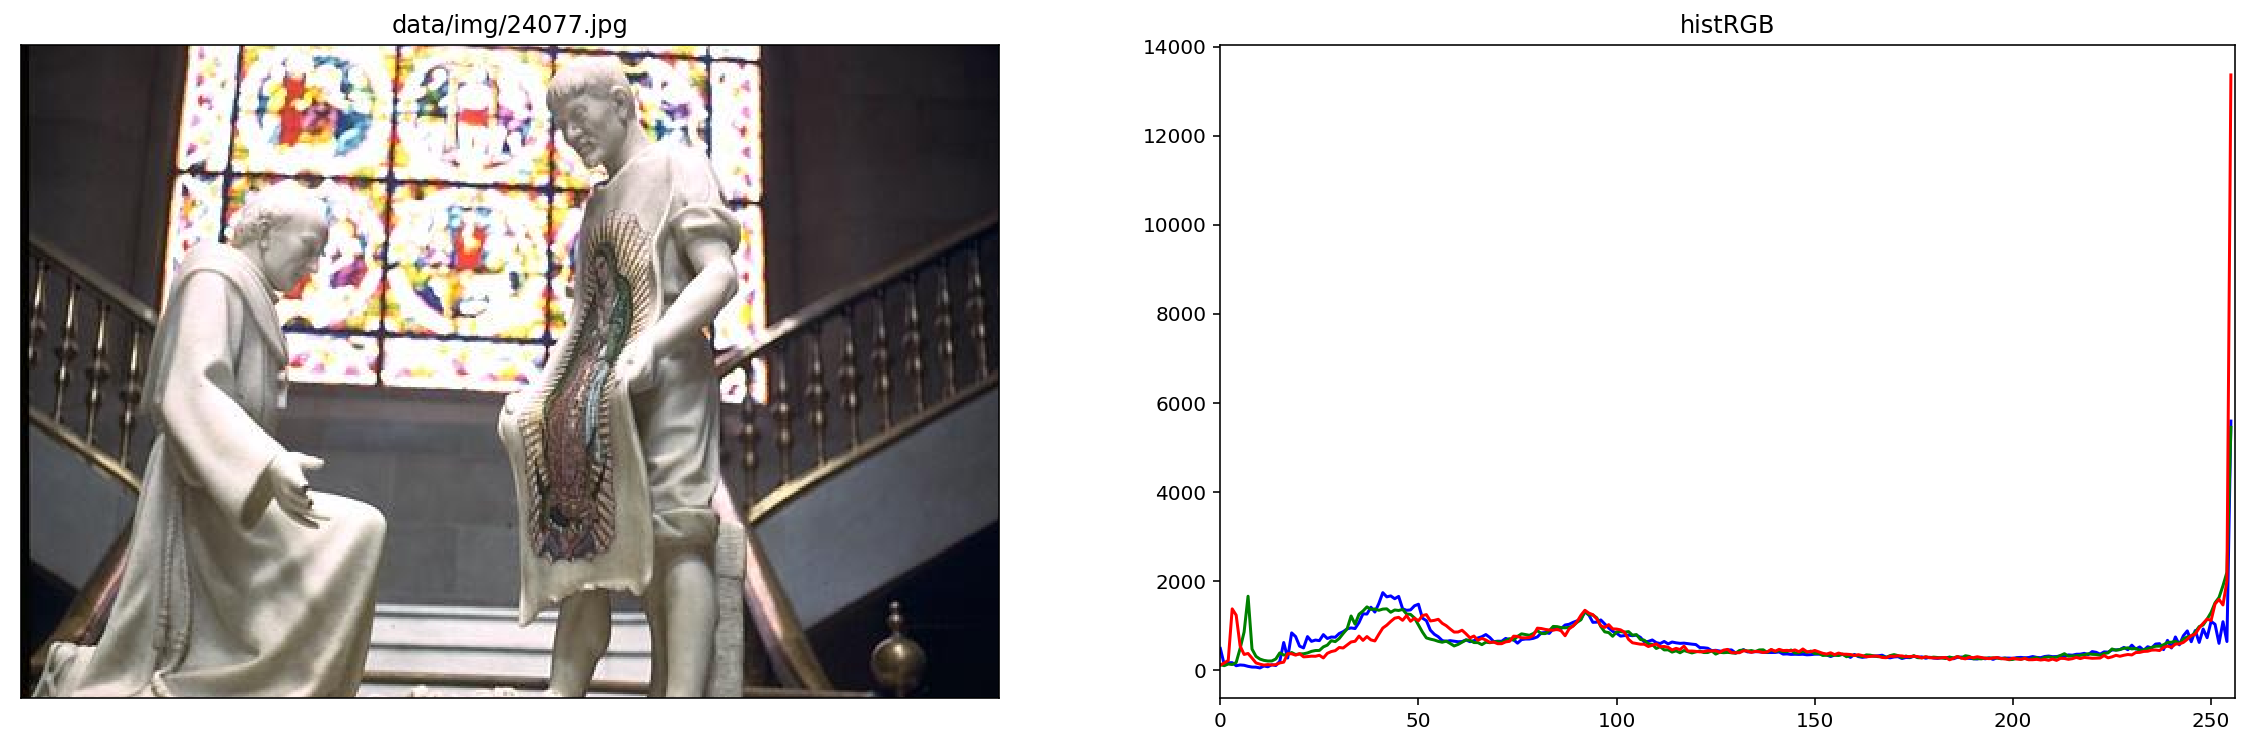

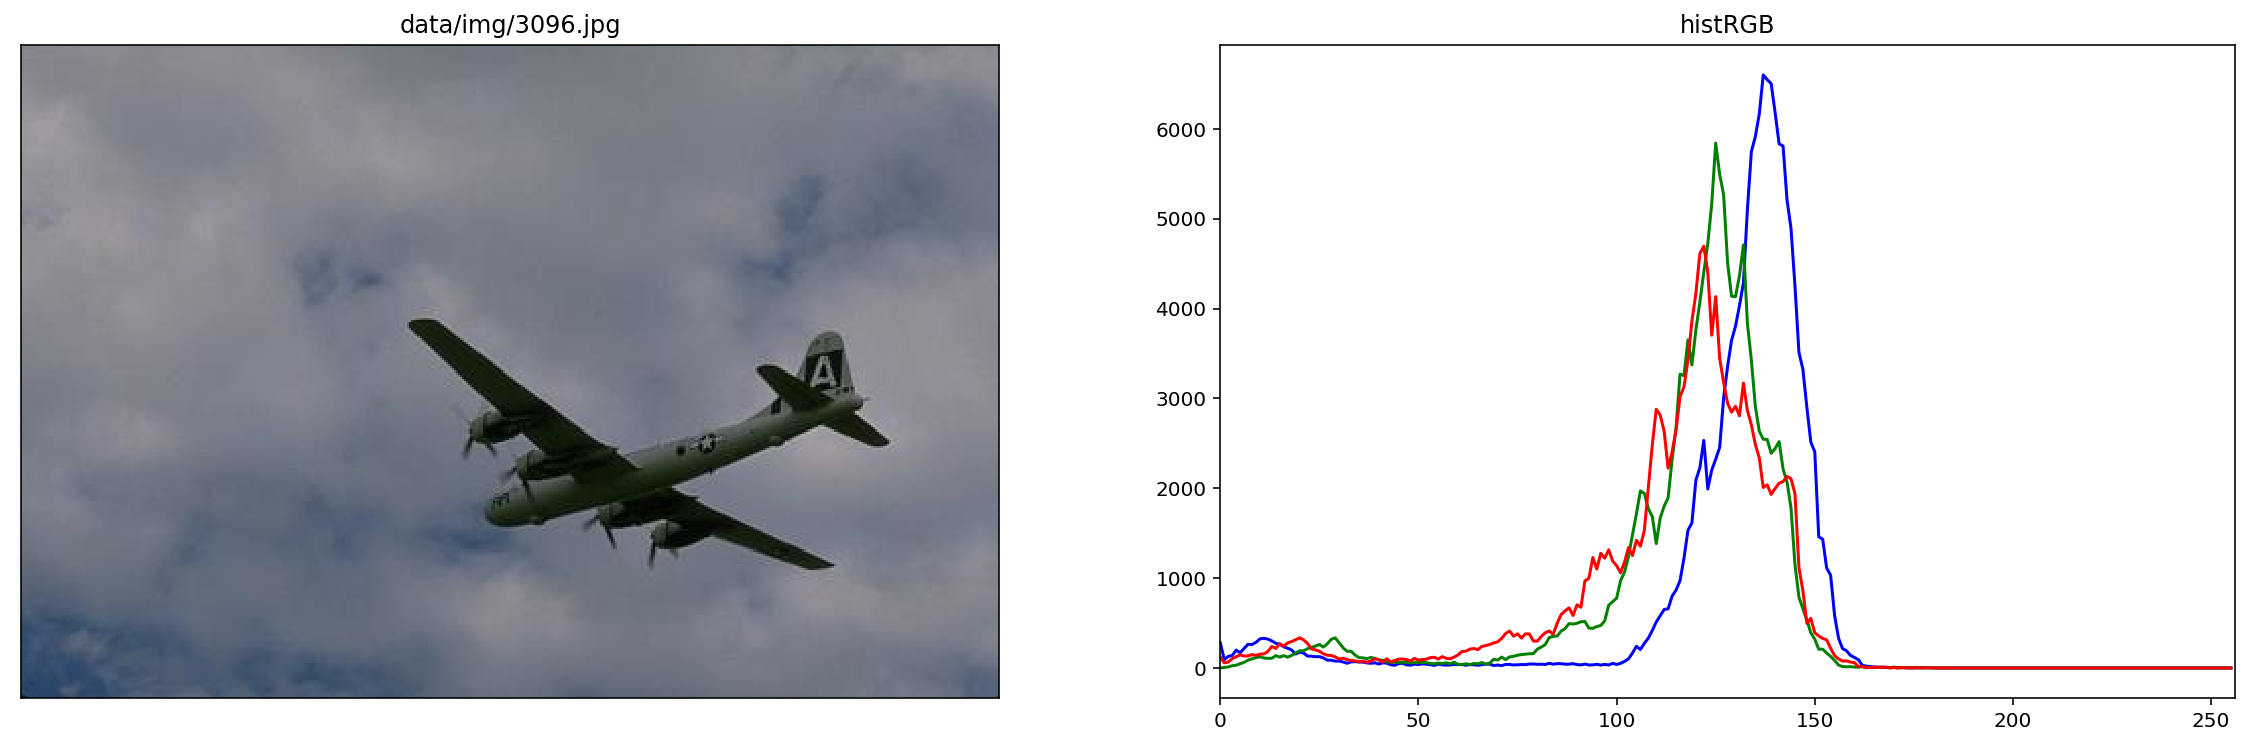

In [5]:
IMG_NAMES = ['24077.jpg', '3096.jpg', '12084.jpg'] # Take any 3 images from the dataset in "data/img"

def show_histRGB(img, imagepath):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(20, 6)) # Figure size can be adjusted.
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the corresponding rgb image using pyplot.
    plt.xticks([]), 
    plt.yticks([])
    plt.title(imagepath)
    for i, col in enumerate(color):
        # a) Calculate the histograms for this image.
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.subplot(122), plt.plot(histr, color = col) # plot histogram with the b g r channels.
        plt.xlim([0, 256])
        plt.title("histRGB")
    plt.show()
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img = cv2.imread(imagepath) # read the image from image path using opencv.
    show_histRGB(img, imagepath)

### b) What can you say about the spread of the color intensities for these images? (Please briefly answer this question in this block)
In the first image, white is the dominant color, hence we can see spike in all three r,g,b towards 255. Next dominant is red.

In the second image, as it is the image of a plane in the sky, we can see higher value of blue dominating. next is green because of color of the plane. red is balancing out blue and green for white pixels of the clouds.

In the third image clearly higher value of red dominates.

## 2.2 Global Histogram Equalization

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


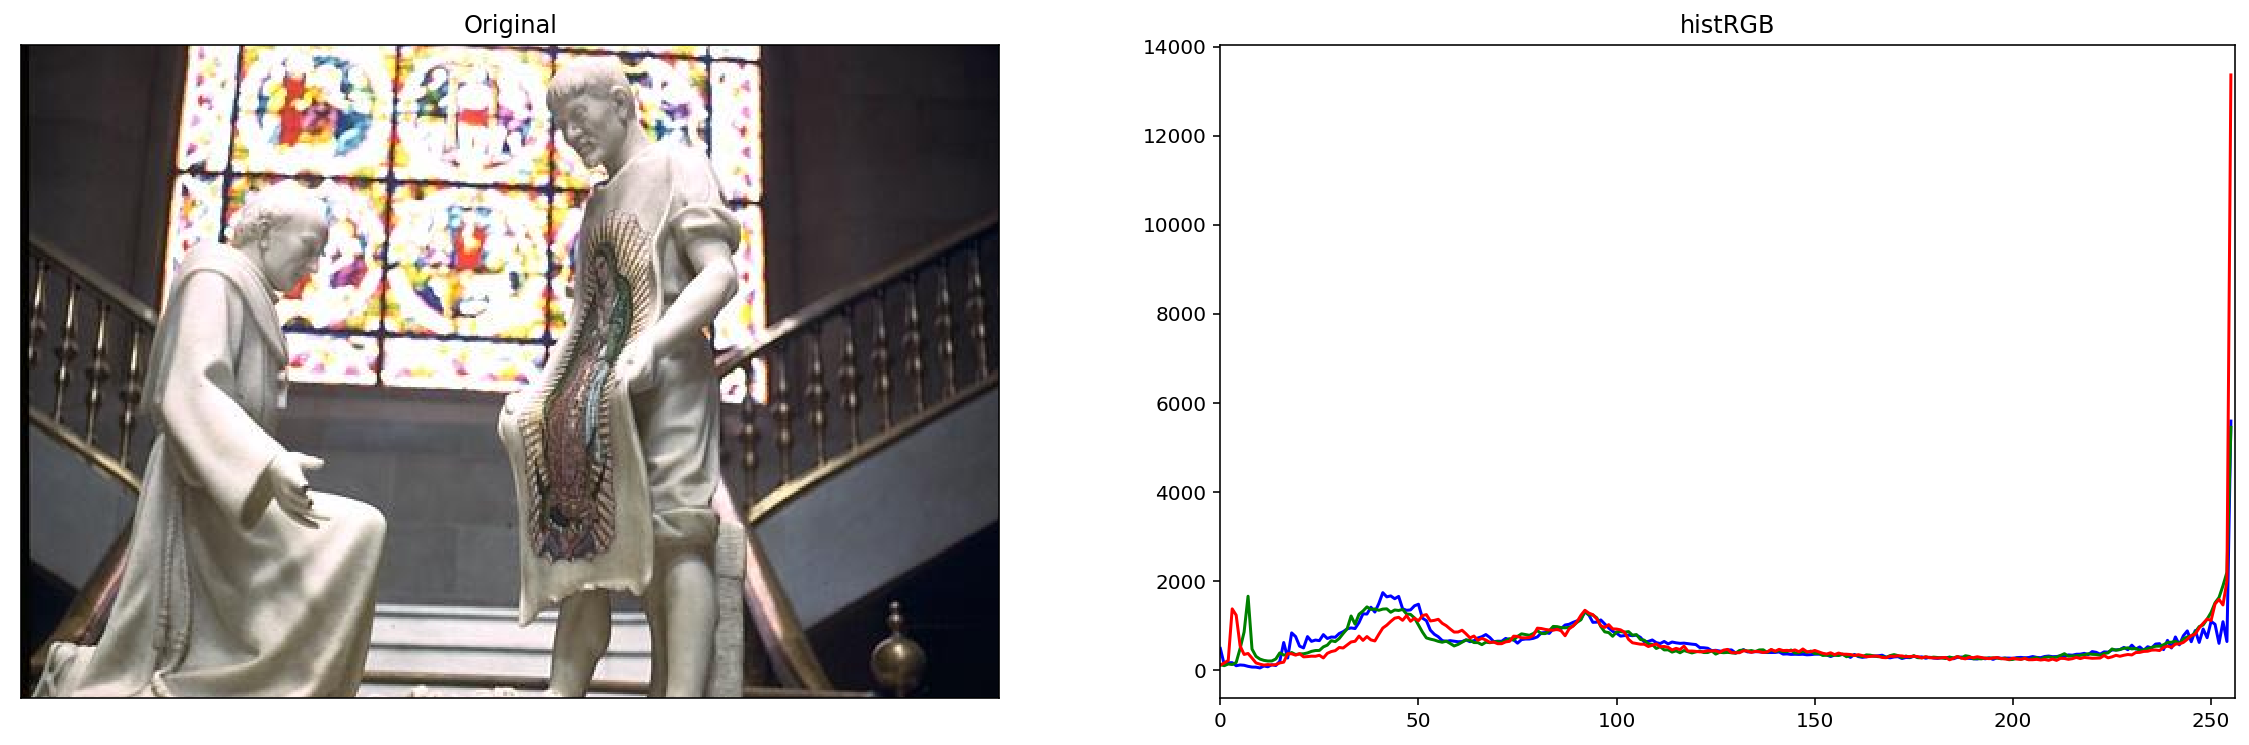

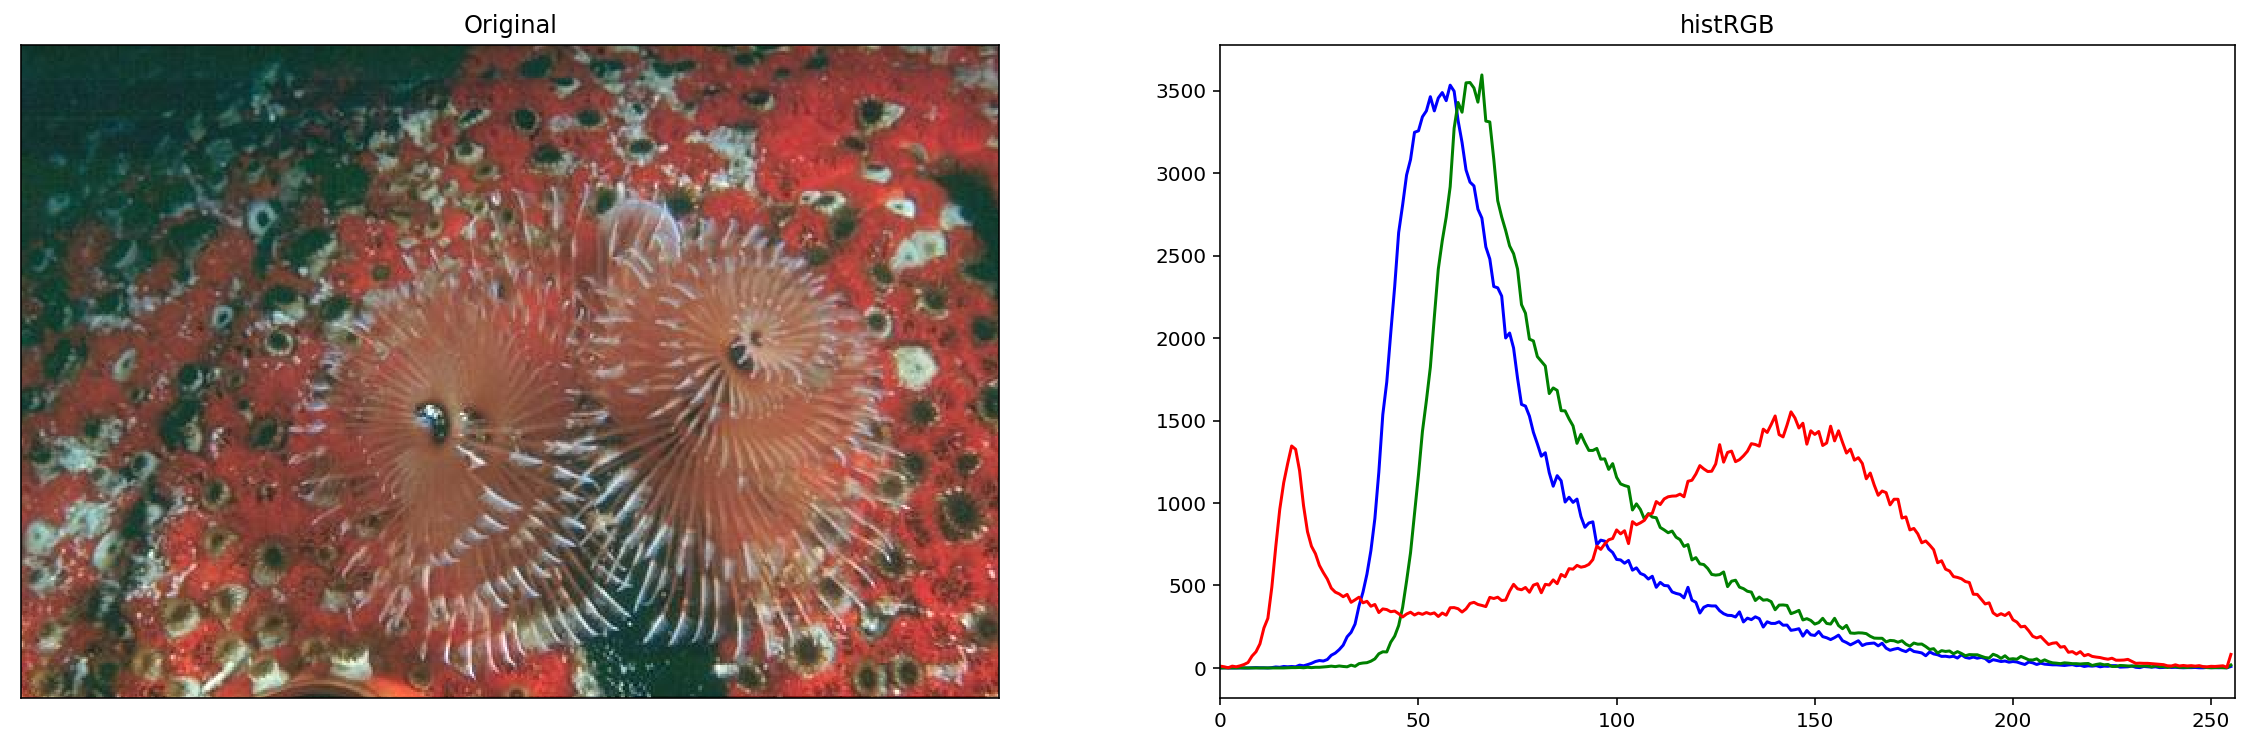

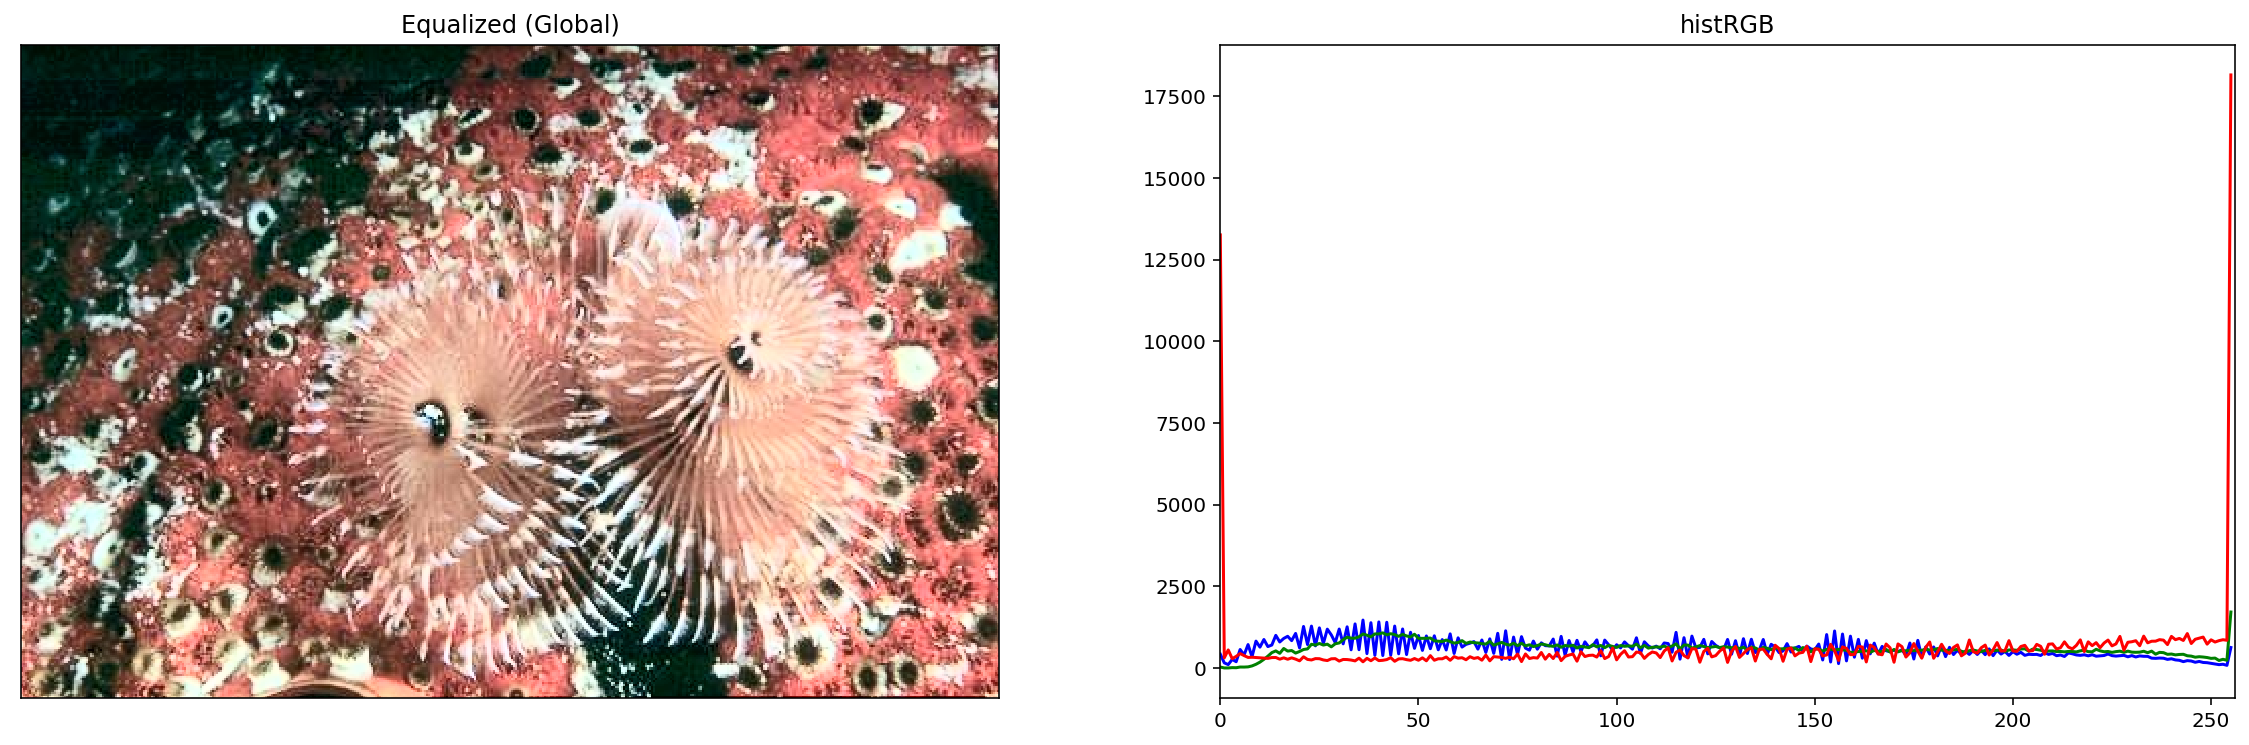

In [7]:
def histogram_equalization(imagepath):
    img = cv2.imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convert the image to YUV
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # Apply global histogram equalization on Y channel
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # Convert back to BGR 
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Global)")
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    histogram_equalization(imagepath)


## 2.3 Adaptive Histogram Equalization (CLAHE)

In [11]:
img.shape

(321, 481, 3)

Grid Size: 10x10 and clipLimit is 40.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


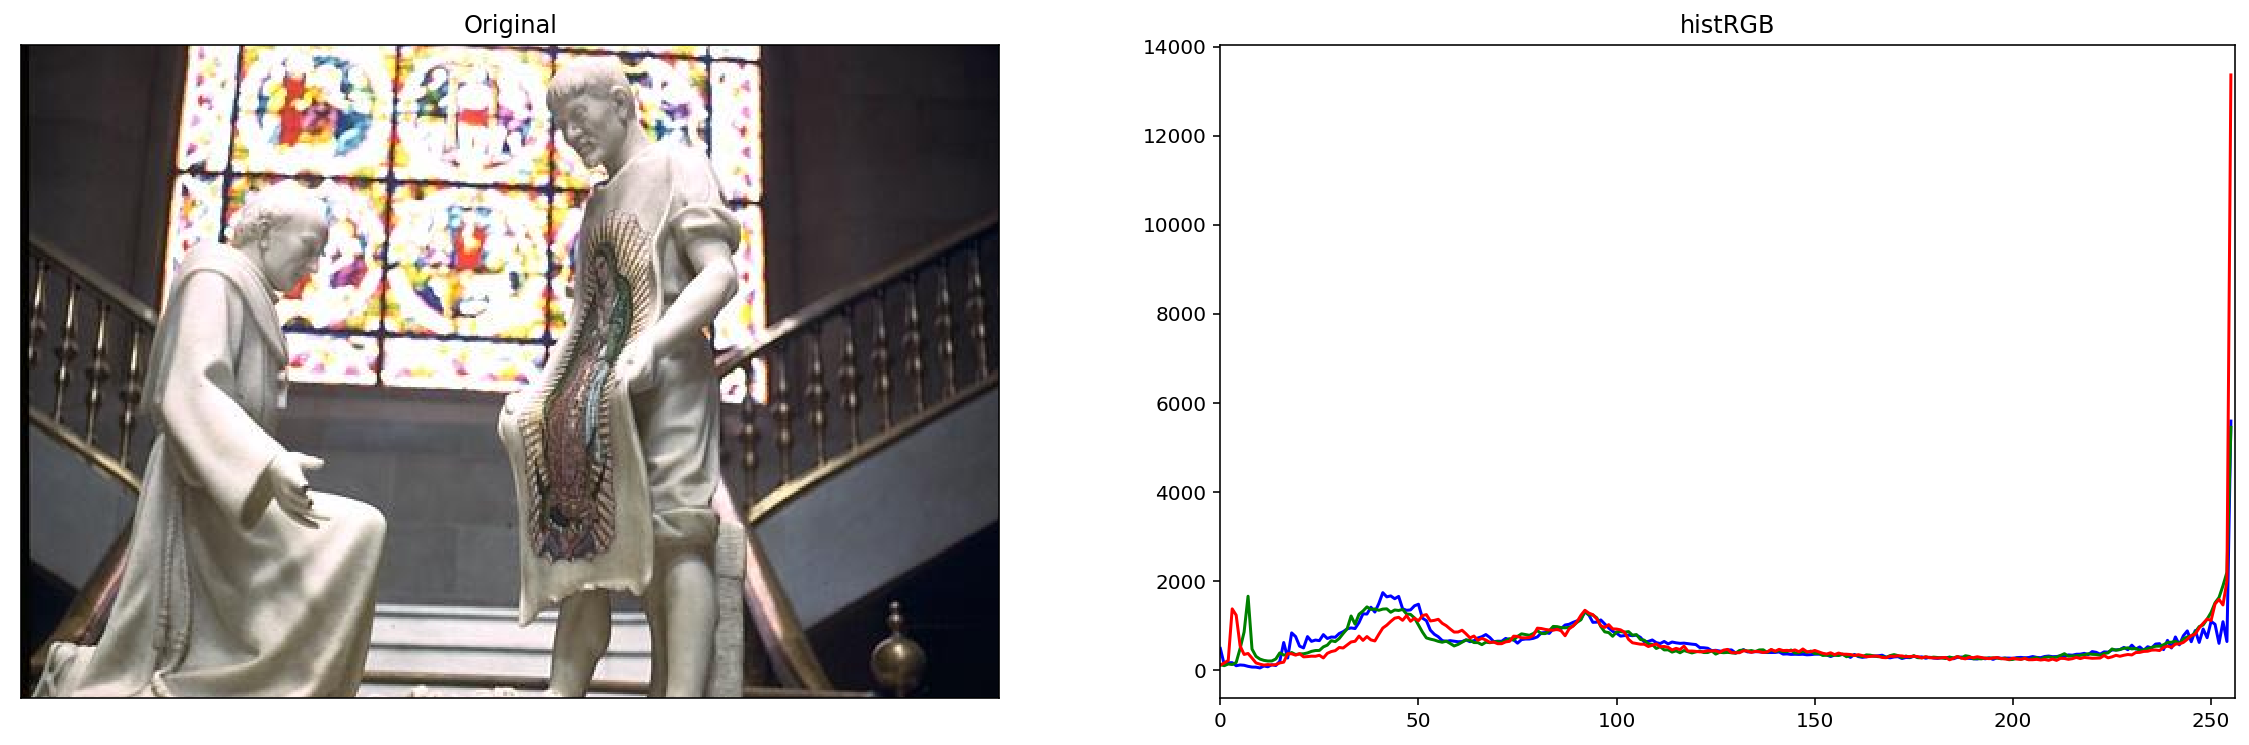

Grid Size: 10x10 and clipLimit is 40.0


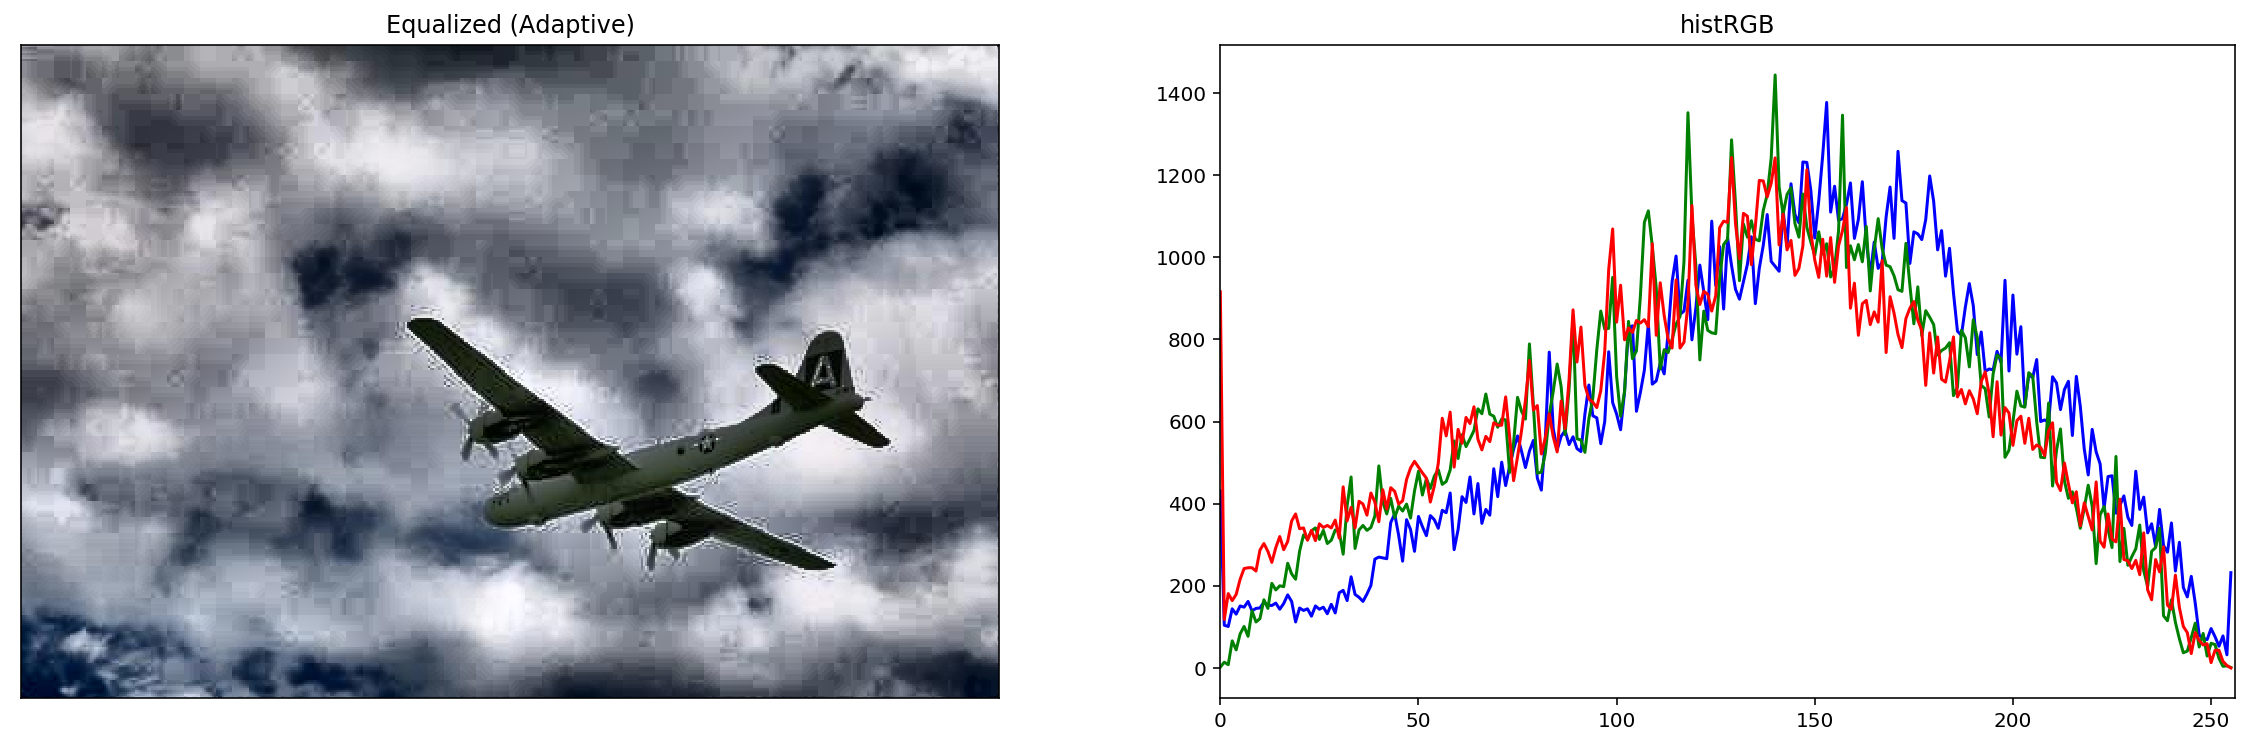

Grid Size: 10x10 and clipLimit is 40.0


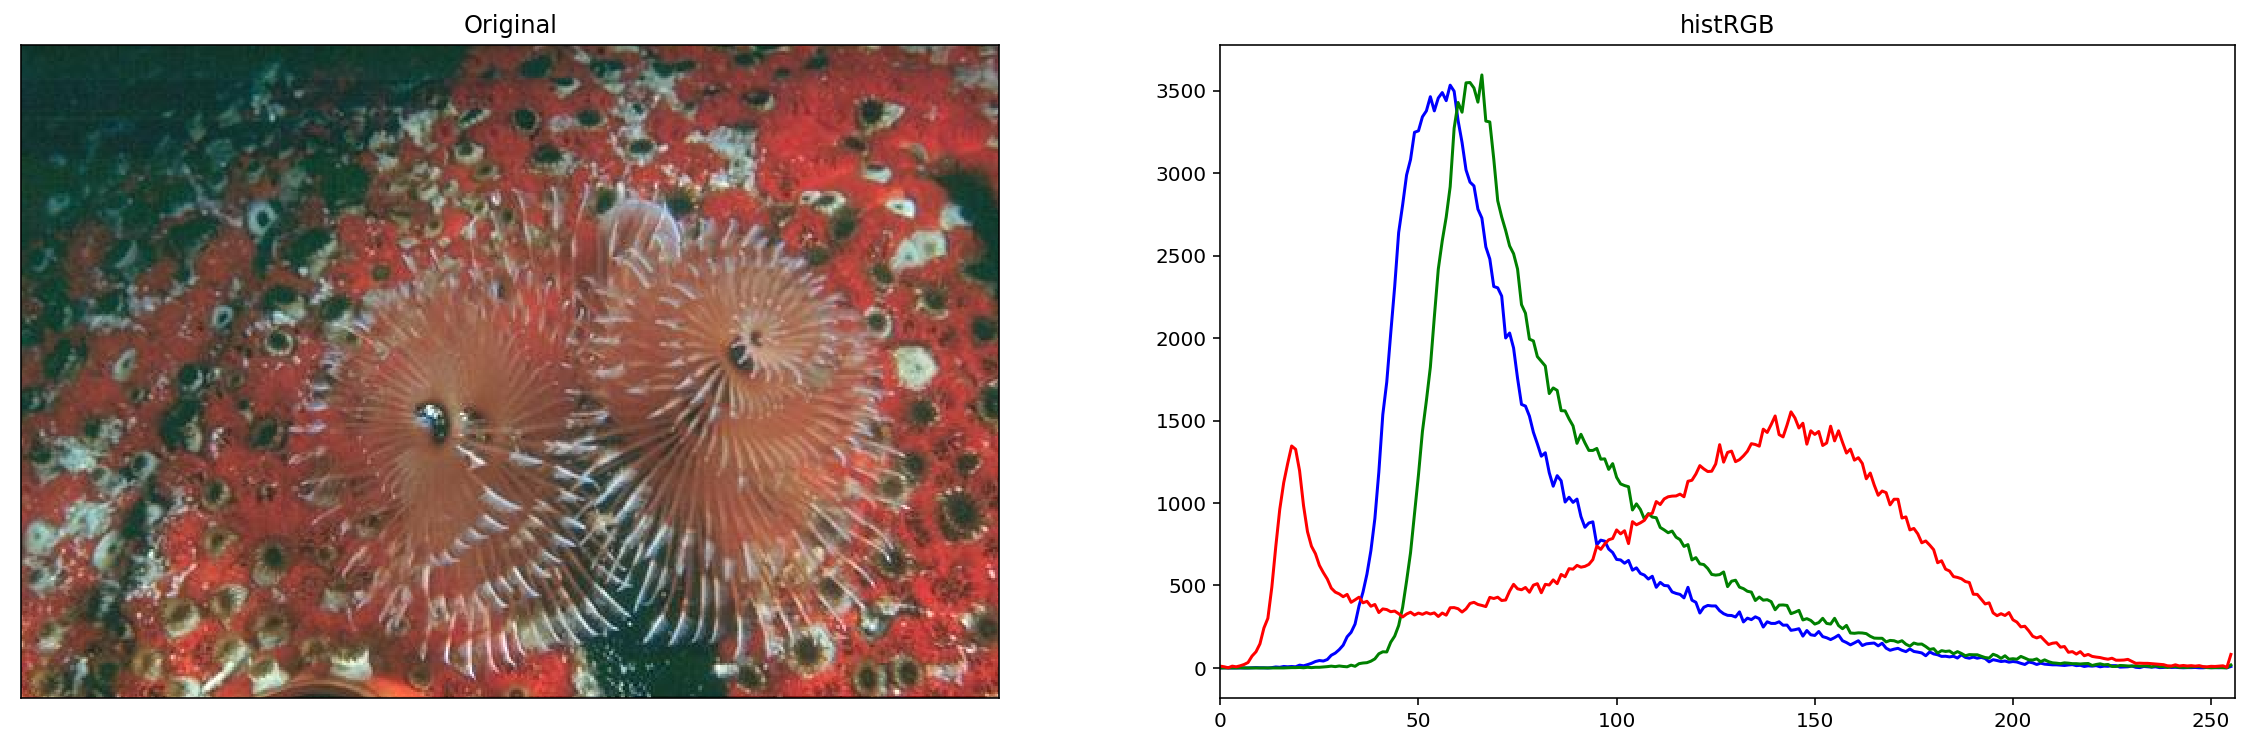

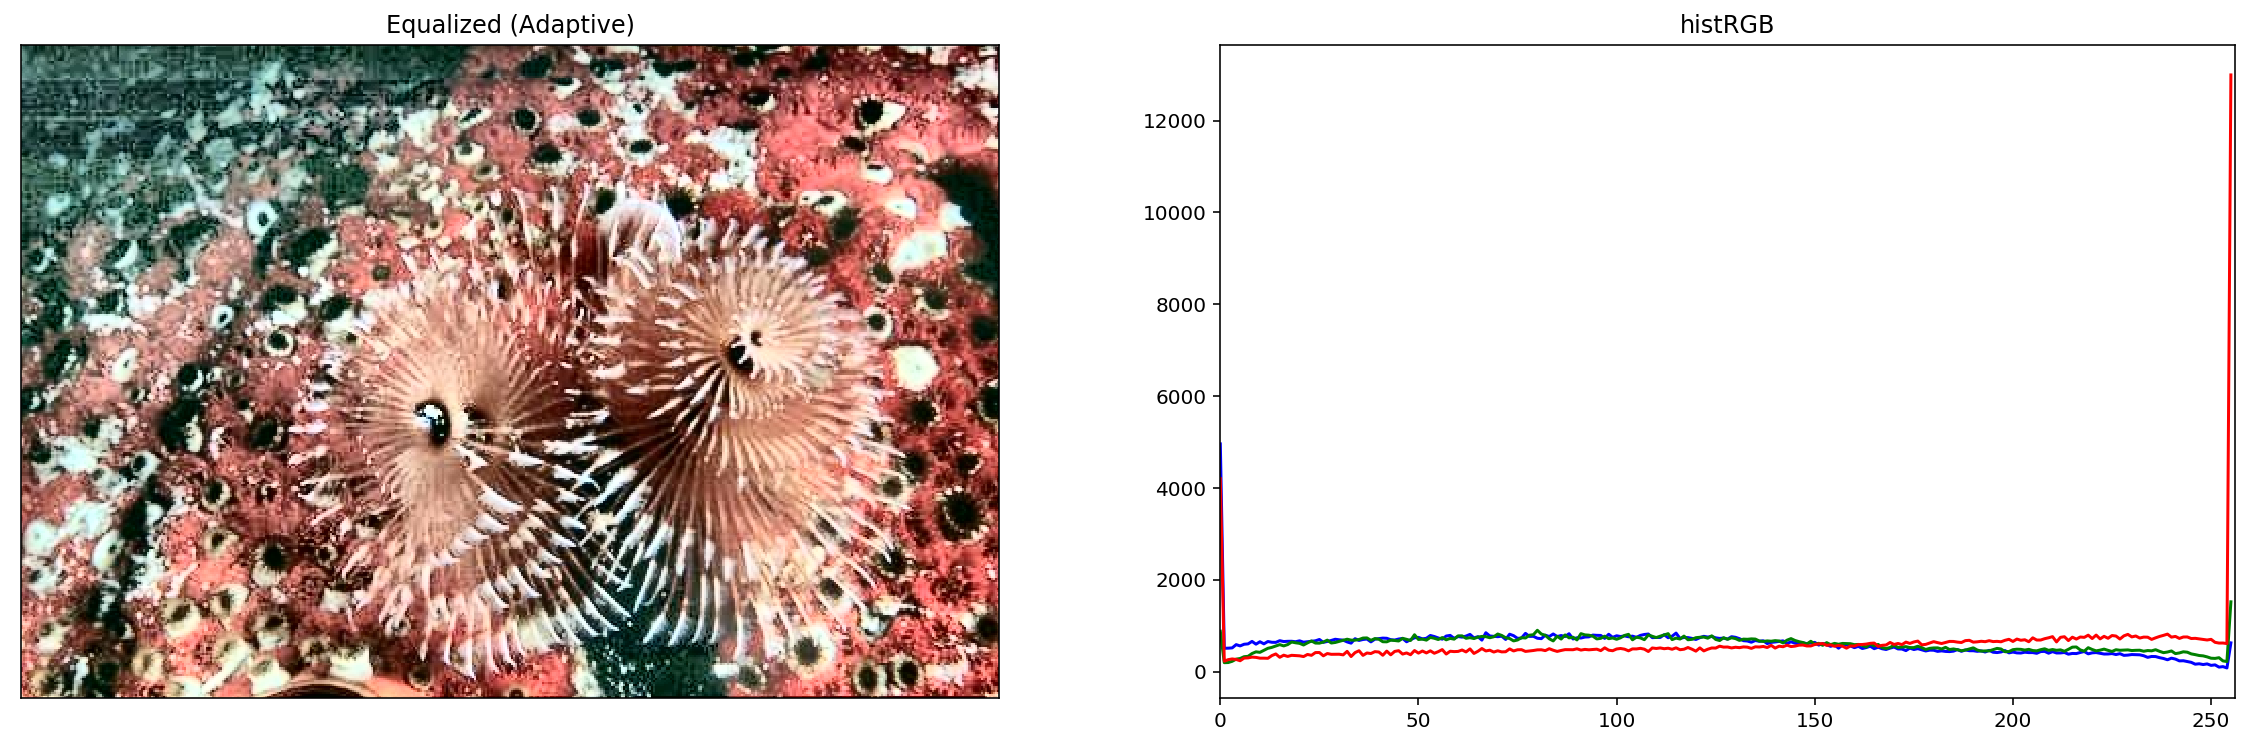

In [31]:
def adaptive_histogram_equalization(imagepath):
    img = cv2.imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convert the image to YUV
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(5,5)) # a) Create clahe    
    print('Grid Size: 10x10 and clipLimit is 40.0') # b) Print all the hyper parameters used.
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0]) # c) Apply CLAHE onto the Y channel
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # Convert back to BGR
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Adaptive)")

for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    adaptive_histogram_equalization(imagepath)

###  d) Did you find any difference between the two techniques? (Please briefly answer this question in this block)

Grid Size: 10x10 and clipLimit is 40.0

The global histogram equalization method considers the global contrast of the image. This works well when the distribution of pixel values is similar throughout the image. However, when the image contains regions that are significantly lighter or darker than most of the image, the contrast in those regions will not be sufficiently enhanced. for example the plane image. whereas CLAHE, improves on this by transforming each pixel with a transformation function derived from a neighbourhood region. To avoid the noise to be amplified in color-constant regions, a contrast limit is imposed. a contrast is imposed.